# **Import Library**

In [2]:
from nltk.corpus import stopwords # Daftar kata-kata berhenti dalam teks
from nltk.stem import PorterStemmer # Stemmer yang digunakan adalah Porter Stemmer.
from nltk.tokenize import word_tokenize # Tokenisasi teks
from sklearn.ensemble import RandomForestClassifier # Algoritma Random Forest untuk klasifikasi
from sklearn.feature_extraction.text import TfidfVectorizer # Konversi teks menjadi vektor TF-IDF
from sklearn.linear_model import LogisticRegression # Algoritma Logistic Regression untuk klasifikasi
from sklearn.metrics import accuracy_score # Metrik akurasi
from sklearn.model_selection import train_test_split # Membagi data menjadi set pelatihan dan pengujian
from sklearn.naive_bayes import BernoulliNB # Algoritma Naive Bayes untuk klasifikasi
from sklearn.tree import DecisionTreeClassifier # Algoritma Decision Tree untuk klasifikasi
from textblob import TextBlob # Pustaka untuk pemrosesan bahasa alami
from wordcloud import WordCloud # Membuat visualisasi berbentuk awan kata (word cloud) dari teks
import matplotlib.pyplot as plt # Matplotlib untuk visualisasi data
import nltk # Import pustaka NLTK (Natural Language Toolkit).
import numpy as np # NumPy untuk komputasi numerik
import pandas as pd # Pandas untuk manipulasi dan analisis data
import re # Modul untuk bekerja dengan ekspresi reguler
import seaborn as sns # Seaborn untuk visualisasi data statistik, mengatur gaya visualisasi
import string # Berisi konstanta string, seperti tanda baca
np.random.seed(0) # Mengatur seed untuk reproduktibilitas
pd.options.mode.chained_assignment = None # Menonaktifkan peringatan chaining

In [4]:
nltk.download('punkt')  # Mengunduh dataset yang diperlukan untuk tokenisasi teks.
nltk.download('stopwords')  # Mengunduh dataset yang berisi daftar kata-kata berhenti (stop words) dalam berbagai bahasa.

[nltk_data] Downloading package punkt to /home/bima/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/bima/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Loading Dataset

In [5]:
# Membaca dataset ulasan aplikasi 8 Ball Pool
app_reviews_df = pd.read_csv('ulasan_aplikasi_8ballpool.csv')
app_reviews_df = app_reviews_df[['content']]

# Menghitung jumlah baris dan kolom dalam DataFrame
jumlah_ulasan, jumlah_kolom = app_reviews_df.shape

print("Jumlah baris:", jumlah_ulasan)
print("Jumlah kolom:", jumlah_kolom)

Jumlah baris: 94500
Jumlah kolom: 1


In [6]:
# Menampilkan lima baris pertama dari DataFrame app_reviews_df
app_reviews_df.head()

,content
0,Game is very fun and helps you learn about pla...
1,"Would rate it higher, but the physics in this ..."
2,This game is straight up fixed. Insane English...
3,After playing for years now it's time to updat...
4,"The game is fun and addicting, but also extrem..."


In [7]:
# Menampilkan informasi tentang DataFrame app_reviews_df
app_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94500 entries, 0 to 94499
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  94500 non-null  object
dtypes: object(1)
memory usage: 738.4+ KB


In [8]:
# Membuat DataFrame baru (clean_df) dengan menghapus baris yang memiliki nilai yang hilang (NaN) dari app_reviews_df
clean_df = app_reviews_df.dropna()

In [9]:
# Menampilkan informasi tentang DataFrame clean_df setelah membersihkan nilai yang hilang (NaN)
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94500 entries, 0 to 94499
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  94500 non-null  object
dtypes: object(1)
memory usage: 738.4+ KB


In [10]:
# Menghapus baris duplikat dari DataFrame clean_df
clean_df = clean_df.drop_duplicates()

# Menghitung jumlah baris dan kolom dalam DataFrame clean_df setelah menghapus duplikat
jumlah_ulasan_setelah_hapus_duplikat, jumlah_kolom_setelah_hapus_duplikat = clean_df.shape

print("Jumlah baris sebelum menghapus duplikat:", jumlah_ulasan)
print("Jumlah baris setelah menghapus duplikat:", jumlah_ulasan_setelah_hapus_duplikat)

Jumlah baris sebelum menghapus duplikat: 94500
Jumlah baris setelah menghapus duplikat: 93585


## Preprocessing

Berikut adalah beberapa fungsi yang digunakan untuk membersihkan dan memproses teks. Inilah penjelasan singkat tentang masing-masing fungsi:

1. `cleaningText(text)`: Fungsi ini digunakan untuk membersihkan teks dengan beberapa langkah, seperti menghapus mention, hashtag, RT (retweet), tautan (link), angka, dan tanda baca. Selain itu, itu juga menggantikan karakter newline dengan spasi dan menghilangkan spasi ekstra di awal dan akhir teks.

2. `casefoldingText(text)`: Fungsi ini mengonversi semua karakter dalam teks menjadi huruf kecil (lowercase), sehingga teks menjadi lebih seragam.

3. `tokenizingText(text)`: Fungsi ini digunakan untuk membagi teks menjadi daftar kata atau token. Ini berguna untuk mengurai teks menjadi komponen-komponen dasar.

4. `filteringText(text)`: Fungsi ini digunakan untuk menghapus kata-kata berhenti (stopwords) dalam teks. Anda telah memperbarui daftar kata-kata berhenti dengan beberapa kata tambahan.

5. `stemmingText(text)`: Fungsi ini menerapkan stemming pada teks, yaitu mengurangi kata-kata menjadi bentuk dasarnya. Anda menggunakan pustaka Sastrawi untuk melakukan stemming dalam bahasa Indonesia.

6. `toSentence(list_words)`: Fungsi ini digunakan untuk menggabungkan daftar kata-kata menjadi sebuah kalimat.

Anda dapat menggunakan fungsi-fungsi ini dalam proyek Anda untuk membersihkan, memproses, dan mempersiapkan teks sebelum melakukan analisis sentimen. Pastikan untuk memanggil fungsi-fungsi ini dengan benar sesuai dengan tahap pemrosesan teks yang Anda inginkan.

In [11]:
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # remove mentions
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # remove hashtag
    text = re.sub(r'RT[\s]', '', text) # remove RT
    text = re.sub(r"http\S+", '', text) # remove link
    text = re.sub(r'[0-9]+', '', text) # remove numbers
    text = re.sub(r'[^\w\s]', '', text) # remove numbers
    text = text.replace('\n', ' ') # replace new line into space
    text = text.translate(str.maketrans('', '', string.punctuation)) # remove all punctuations
    text = text.strip(' ') # remove characters space from both left and right text
    return text

def casefoldingText(text): # Converting all the characters in a text into lower case
    text = text.lower()
    return text

def tokenizingText(text): # Tokenizing or splitting a string, text into a list of tokens
    text = word_tokenize(text)
    return text

def filteringText(text): # Remove stopwors in a text
    listStopwords = set(stopwords.words('english'))
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text

def stemmingText(text): # Reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words
    # Membuat objek stemmer
    stemmer = PorterStemmer()

    # Menerapkan stemming pada setiap kata dalam daftar
    stemmed_words = [stemmer.stem(word) for word in text]

    return stemmed_words

def toSentence(list_words): # Convert list of words into sentence
    sentence = ' '.join(word for word in list_words)
    return sentence

In [12]:
%%time
# Membersihkan teks dan menyimpannya di kolom 'text_clean'
clean_df['text_clean'] = clean_df['content'].apply(cleaningText)

# Mengubah huruf dalam teks menjadi huruf kecil dan menyimpannya di 'text_casefoldingText'
clean_df['text_casefoldingText'] = clean_df['text_clean'].apply(casefoldingText)

# Memecah teks menjadi token (kata-kata) dan menyimpannya di 'text_tokenizingText'
clean_df['text_tokenizingText'] = clean_df['text_casefoldingText'].apply(tokenizingText)

# Menghapus kata-kata stop (kata-kata umum) dan menyimpannya di 'text_stopword'
clean_df['text_stopword'] = clean_df['text_tokenizingText'].apply(filteringText)

# Stemming teks dan menyimpannya di 'text_stemmingText'
clean_df['text_stemmingText'] = clean_df['text_stopword'].apply(stemmingText)

# Menggabungkan token-token menjadi kalimat dan menyimpannya di 'text_akhir'
clean_df['text_akhir'] = clean_df['text_stemmingText'].apply(toSentence)

CPU times: user 47.7 s, sys: 1.65 s, total: 49.3 s
Wall time: 50 s


In [13]:
clean_df.head(5)

,content,text_clean,text_casefoldingText,text_tokenizingText,text_stopword,text_stemmingText,text_akhir
0,Game is very fun and helps you learn about pla...,Game is very fun and helps you learn about pla...,game is very fun and helps you learn about pla...,"[game, is, very, fun, and, helps, you, learn, ...","[game, fun, helps, learn, playing, game, real,...","[game, fun, help, learn, play, game, real, rig...",game fun help learn play game real rig opinion...
1,"Would rate it higher, but the physics in this ...",Would rate it higher but the physics in this g...,would rate it higher but the physics in this g...,"[would, rate, it, higher, but, the, physics, i...","[would, rate, higher, physics, game, inconsist...","[would, rate, higher, physic, game, inconsist,...",would rate higher physic game inconsist exampl...
2,This game is straight up fixed. Insane English...,This game is straight up fixed Insane English ...,this game is straight up fixed insane english ...,"[this, game, is, straight, up, fixed, insane, ...","[game, straight, fixed, insane, english, didnt...","[game, straight, fix, insan, english, didnt, s...",game straight fix insan english didnt set appl...
3,After playing for years now it's time to updat...,After playing for years now its time to update...,after playing for years now its time to update...,"[after, playing, for, years, now, its, time, t...","[playing, years, time, update, review, game, a...","[play, year, time, updat, review, game, addict...",play year time updat review game addict amount...
4,"The game is fun and addicting, but also extrem...",The game is fun and addicting but also extreme...,the game is fun and addicting but also extreme...,"[the, game, is, fun, and, addicting, but, also...","[game, fun, addicting, also, extremely, frustr...","[game, fun, addict, also, extrem, frustrat, am...",game fun addict also extrem frustrat amount sl...


## Labelling

In [14]:
%%time
clean_df['polarity'] = clean_df['text_akhir'].apply(lambda x: TextBlob(x).sentiment.polarity)
clean_df.head(2)

CPU times: user 17.6 s, sys: 35.9 ms, total: 17.6 s
Wall time: 17.9 s


,content,text_clean,text_casefoldingText,text_tokenizingText,text_stopword,text_stemmingText,text_akhir,polarity
0,Game is very fun and helps you learn about pla...,Game is very fun and helps you learn about pla...,game is very fun and helps you learn about pla...,"[game, is, very, fun, and, helps, you, learn, ...","[game, fun, helps, learn, playing, game, real,...","[game, fun, help, learn, play, game, real, rig...",game fun help learn play game real rig opinion...,0.088889
1,"Would rate it higher, but the physics in this ...",Would rate it higher but the physics in this g...,would rate it higher but the physics in this g...,"[would, rate, it, higher, but, the, physics, i...","[would, rate, higher, physics, game, inconsist...","[would, rate, higher, physic, game, inconsist,...",would rate higher physic game inconsist exampl...,-0.012245


In [15]:
def polarity_to_label(x):
    if(x >= -1 and x < 0):
        return 'neg'
    if(x == 0):
        return 'neutral'
    if(x > 0 and x <= 1):
        return 'pos'

clean_df['label'] = clean_df['polarity'].apply(polarity_to_label)
clean_df.head(2)

,content,text_clean,text_casefoldingText,text_tokenizingText,text_stopword,text_stemmingText,text_akhir,polarity,label
0,Game is very fun and helps you learn about pla...,Game is very fun and helps you learn about pla...,game is very fun and helps you learn about pla...,"[game, is, very, fun, and, helps, you, learn, ...","[game, fun, helps, learn, playing, game, real,...","[game, fun, help, learn, play, game, real, rig...",game fun help learn play game real rig opinion...,0.088889,pos
1,"Would rate it higher, but the physics in this ...",Would rate it higher but the physics in this g...,would rate it higher but the physics in this g...,"[would, rate, it, higher, but, the, physics, i...","[would, rate, higher, physics, game, inconsist...","[would, rate, higher, physic, game, inconsist,...",would rate higher physic game inconsist exampl...,-0.012245,neg


## Imbalance Data Handling

In [17]:
clean_df.value_counts('label')

label
neg        42812
pos        42449
neutral     8324
Name: count, dtype: int64

In [18]:
# Pisahkan DataFrame berdasarkan kategori label
positive_df = clean_df[clean_df['label'] == 'pos'].iloc[:8000]
neutral_df = clean_df[clean_df['label'] == 'neutral'].iloc[:8000]
negative_df = clean_df[clean_df['label'] == 'neg'].iloc[:8000]

print(positive_df.shape)
print(neutral_df.shape)
print(negative_df.shape)

(8000, 9)
(8000, 9)
(8000, 9)


In [19]:
# Gabungkan kembali DataFrame
balanced_df = pd.concat([positive_df, neutral_df, negative_df])

# Reset index DataFrame
balanced_df = balanced_df.reset_index(drop=True)

# Display the balanced DataFrame
balanced_df.head()

,content,text_clean,text_casefoldingText,text_tokenizingText,text_stopword,text_stemmingText,text_akhir,polarity,label
0,Game is very fun and helps you learn about pla...,Game is very fun and helps you learn about pla...,game is very fun and helps you learn about pla...,"[game, is, very, fun, and, helps, you, learn, ...","[game, fun, helps, learn, playing, game, real,...","[game, fun, help, learn, play, game, real, rig...",game fun help learn play game real rig opinion...,0.088889,pos
1,This game is straight up fixed. Insane English...,This game is straight up fixed Insane English ...,this game is straight up fixed insane english ...,"[this, game, is, straight, up, fixed, insane, ...","[game, straight, fixed, insane, english, didnt...","[game, straight, fix, insan, english, didnt, s...",game straight fix insan english didnt set appl...,0.020000,pos
2,"Once you get above Silver League, it's almost ...",Once you get above Silver League its almost im...,once you get above silver league its almost im...,"[once, you, get, above, silver, league, its, a...","[get, silver, league, almost, impossible, win,...","[get, silver, leagu, almost, imposs, win, game...",get silver leagu almost imposs win game row wi...,0.100000,pos
3,So. Much. Fun! So much more than just pool. Th...,So Much Fun So much more than just pool Theres...,so much fun so much more than just pool theres...,"[so, much, fun, so, much, more, than, just, po...","[much, fun, much, pool, theres, items, collect...","[much, fun, much, pool, there, item, collect, ...",much fun much pool there item collect upgrad l...,0.248485,pos
4,It's pretty good if you consistently pay for p...,Its pretty good if you consistently pay for pa...,its pretty good if you consistently pay for pa...,"[its, pretty, good, if, you, consistently, pay...","[pretty, good, consistently, pay, pass, dont, ...","[pretti, good, consist, pay, pass, dont, good,...",pretti good consist pay pass dont good luck ge...,0.286429,pos


# Deep Learning

In [21]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, LSTM, BatchNormalization, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy as CC
from tensorflow.keras.activations import relu, softmax
from tensorflow.keras.initializers import he_uniform, glorot_uniform
from tensorflow.keras.metrics import AUC
from tensorflow.keras import Model
from tensorflow.keras.regularizers import l2
import tensorflow as tf

2024-07-21 23:49:56.684869: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-21 23:49:56.688943: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-21 23:49:56.699428: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-21 23:49:56.718907: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-21 23:49:56.724895: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-21 23:49:56.740513: I tensorflow/core/platform/cpu_feature_gu

In [24]:
text_data = balanced_df['text_akhir'].astype(str).values
text_data

array(['game fun help learn play game real rig opinion set lose your good cue ball mind especi lot coin line oppon alway seem one break time know english work sometim seem opposit find way pocket behind oppon ball rig sure still fun',
       'game straight fix insan english didnt set appli cue make scratch way never could real tabl real life constant strang leav consist elimin run wick fraud run tabl win game babi could make open shot game engin result shot youv warn',
       'get silver leagu almost imposs win game row without spend money came back old account hadnt use win game fairli easili got gold leagu could win mayb everi five game ive oppon run tabl flawlessli sink everi shot cue ball seem mind find way pocket etc game rig cash grab',
       ...,
       'origin star star match make spoil game lot coin place last game peopl rank level higher even get shot time wont play til issu sort',
       'ball clearli hit cushion st contact ball still deem foul hit cushion hit cushion flush

In [25]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 100
tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(text_data)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 16446 unique tokens.


In [26]:
X = tokenizer.texts_to_sequences(text_data)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (24000, 250)


In [27]:
Y = pd.get_dummies(balanced_df['label']).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (24000, 3)


In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(21600, 250) (21600, 3)
(2400, 250) (2400, 3)


In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.callbacks import EarlyStopping

## RNN

### LSTM

In [38]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 5
batch_size = 64

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1, callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/5
304/304 ━━━━━━━━━━━━━━━━━━━━ 73s 232ms/step - accuracy: 0.6131 - loss: 0.8014 - val_accuracy: 0.8606 - val_loss: 0.3571
Epoch 2/5
304/304 ━━━━━━━━━━━━━━━━━━━━ 107s 316ms/step - accuracy: 0.8862 - loss: 0.3121 - val_accuracy: 0.8972 - val_loss: 0.2665
Epoch 3/5
304/304 ━━━━━━━━━━━━━━━━━━━━ 100s 330ms/step - accuracy: 0.9304 - loss: 0.1962 - val_accuracy: 0.9120 - val_loss: 0.2465
Epoch 4/5
304/304 ━━━━━━━━━━━━━━━━━━━━ 74s 240ms/step - accuracy: 0.9538 - loss: 0.1379 - val_accuracy: 0.9153 - val_loss: 0.2520
Epoch 5/5
304/304 ━━━━━━━━━━━━━━━━━━━━ 68s 223ms/step - accuracy: 0.9645 - loss: 0.1101 - val_accuracy: 0.9204 - val_loss: 0.2471


In [39]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.9312 - loss: 0.2161
Test set
  Loss: 0.215
  Accuracy: 0.930


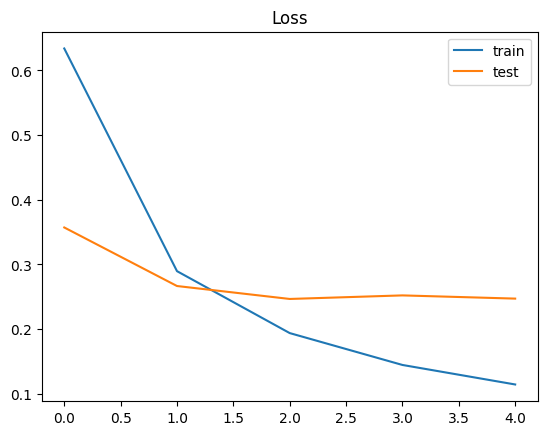

In [40]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

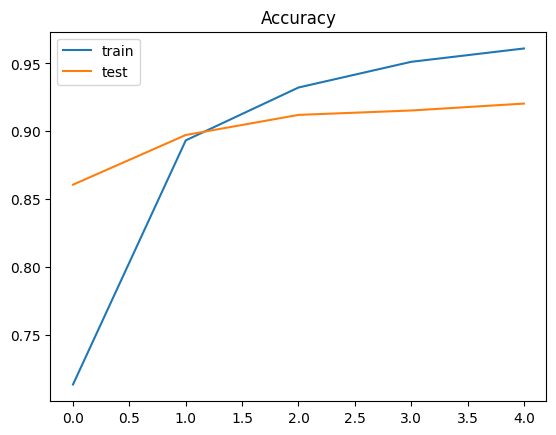

In [45]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [54]:
new_review = ['''Very upsetting, I had a few million coins when the dang game started glitching, I would make a shot and the game would glitch and you could clearly see that the shot went in but the screen would flàsh and the balls would be right back like they were before I shot. And the opponent would have ball in hand. Then for some ungodly reason the game restarted and almost all of my coins were gone!!!!! There should be some way to get them back since it was the game that took them. About ready to delete!!''']
seq = tokenizer.texts_to_sequences(new_review)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = model.predict(padded)
labels = ['neg', 'neutral', 'pos']
print(pred, labels[np.argmax(pred)])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
[[9.9838150e-01 4.0240123e-04 1.2160874e-03]] neg


### Bi-LSTM

In [64]:
# Import Bidirectional
from tensorflow.keras.layers import Bidirectional

In [65]:
# Define the Bi-LSTM model architecture
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(Bidirectional(LSTM(100, dropout=0.2, recurrent_dropout=0.2)))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
epochs = 5
batch_size = 64

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1, callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/5
304/304 ━━━━━━━━━━━━━━━━━━━━ 159s 509ms/step - accuracy: 0.6019 - loss: 0.8131 - val_accuracy: 0.8597 - val_loss: 0.3656
Epoch 2/5
304/304 ━━━━━━━━━━━━━━━━━━━━ 110s 364ms/step - accuracy: 0.8832 - loss: 0.3094 - val_accuracy: 0.9019 - val_loss: 0.2684
Epoch 3/5
304/304 ━━━━━━━━━━━━━━━━━━━━ 129s 320ms/step - accuracy: 0.9333 - loss: 0.1959 - val_accuracy: 0.9144 - val_loss: 0.2446
Epoch 4/5
304/304 ━━━━━━━━━━━━━━━━━━━━ 101s 332ms/step - accuracy: 0.9507 - loss: 0.1396 - val_accuracy: 0.9130 - val_loss: 0.2462
Epoch 5/5
304/304 ━━━━━━━━━━━━━━━━━━━━ 120s 263ms/step - accuracy: 0.9627 - loss: 0.1104 - val_accuracy: 0.9153 - val_loss: 0.2519


In [66]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.9315 - loss: 0.2159
Test set
  Loss: 0.216
  Accuracy: 0.933


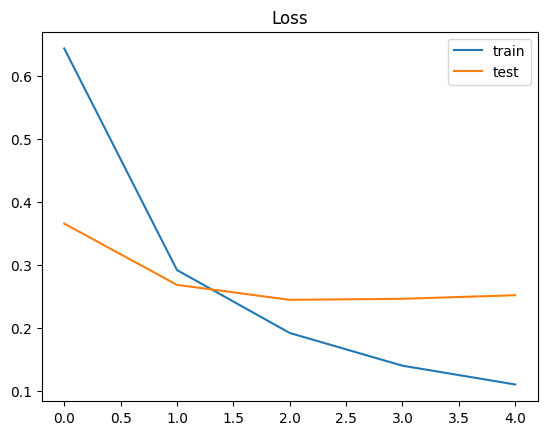

In [67]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

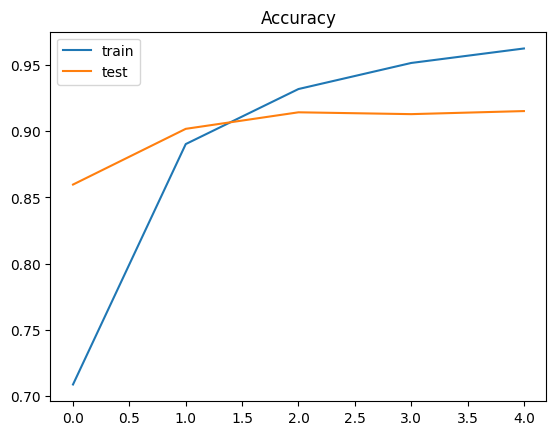

In [68]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [69]:
new_review = ['''Very upsetting, I had a few million coins when the dang game started glitching, I would make a shot and the game would glitch and you could clearly see that the shot went in but the screen would flàsh and the balls would be right back like they were before I shot. And the opponent would have ball in hand. Then for some ungodly reason the game restarted and almost all of my coins were gone!!!!! There should be some way to get them back since it was the game that took them. About ready to delete!!''']
seq = tokenizer.texts_to_sequences(new_review)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = model.predict(padded)
labels = ['neg', 'neutral', 'pos']
print(pred, labels[np.argmax(pred)])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step
[[9.9840158e-01 5.6272378e-04 1.0357207e-03]] neg


### GRU

In [55]:
# GRU model
from tensorflow.keras.layers import GRU

model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(GRU(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 5
batch_size = 64

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1, callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/5


/home/bima/Documents/8BallPool_Sentiment_Analysis/.venv/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


304/304 ━━━━━━━━━━━━━━━━━━━━ 88s 279ms/step - accuracy: 0.4935 - loss: 62205017980928.0000 - val_accuracy: 0.5347 - val_loss: 0.9964
Epoch 2/5
304/304 ━━━━━━━━━━━━━━━━━━━━ 106s 350ms/step - accuracy: 0.6316 - loss: 0.8964 - val_accuracy: 0.5477 - val_loss: 0.9432
Epoch 3/5
304/304 ━━━━━━━━━━━━━━━━━━━━ 145s 359ms/step - accuracy: 0.6863 - loss: 0.7861 - val_accuracy: 0.5639 - val_loss: 0.9225
Epoch 4/5
304/304 ━━━━━━━━━━━━━━━━━━━━ 124s 401ms/step - accuracy: 0.7139 - loss: 0.7126 - val_accuracy: 0.5662 - val_loss: 0.9173
Epoch 5/5
304/304 ━━━━━━━━━━━━━━━━━━━━ 143s 409ms/step - accuracy: 0.7333 - loss: 6187958.0000 - val_accuracy: 0.5597 - val_loss: 0.9242


In [59]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.5813 - loss: 0.8942
Test set
  Loss: 0.894
  Accuracy: 0.585


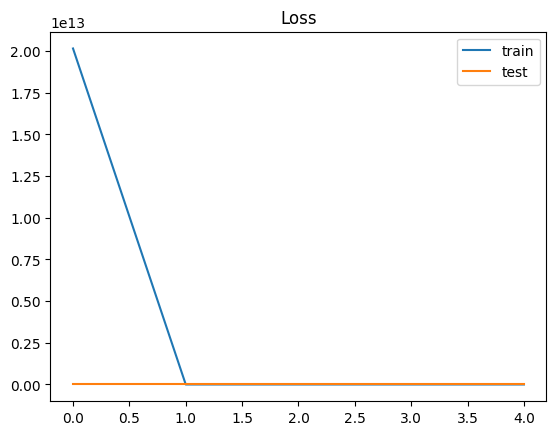

In [60]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

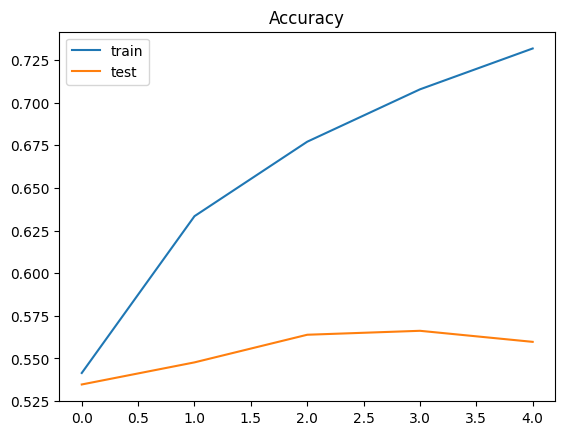

In [61]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [62]:
new_review = ['''Very upsetting, I had a few million coins when the dang game started glitching, I would make a shot and the game would glitch and you could clearly see that the shot went in but the screen would flàsh and the balls would be right back like they were before I shot. And the opponent would have ball in hand. Then for some ungodly reason the game restarted and almost all of my coins were gone!!!!! There should be some way to get them back since it was the game that took them. About ready to delete!!''']
seq = tokenizer.texts_to_sequences(new_review)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = model.predict(padded)
labels = ['neg', 'neutral', 'pos']
print(pred, labels[np.argmax(pred)])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step
[[0.5582928  0.20157127 0.24013591]] neg


## CNN

In [71]:
# CNN model
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D

In [72]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 5
batch_size = 64

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1, callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/5


/home/bima/Documents/8BallPool_Sentiment_Analysis/.venv/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


304/304 ━━━━━━━━━━━━━━━━━━━━ 22s 69ms/step - accuracy: 0.6756 - loss: 0.7562 - val_accuracy: 0.8681 - val_loss: 0.3452
Epoch 2/5
304/304 ━━━━━━━━━━━━━━━━━━━━ 40s 66ms/step - accuracy: 0.9114 - loss: 0.2449 - val_accuracy: 0.8949 - val_loss: 0.2794
Epoch 3/5
304/304 ━━━━━━━━━━━━━━━━━━━━ 20s 65ms/step - accuracy: 0.9605 - loss: 0.1314 - val_accuracy: 0.8972 - val_loss: 0.2745
Epoch 4/5
304/304 ━━━━━━━━━━━━━━━━━━━━ 21s 68ms/step - accuracy: 0.9841 - loss: 0.0665 - val_accuracy: 0.8981 - val_loss: 0.2885
Epoch 5/5
304/304 ━━━━━━━━━━━━━━━━━━━━ 20s 67ms/step - accuracy: 0.9942 - loss: 0.0329 - val_accuracy: 0.8889 - val_loss: 0.3191


In [73]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9041 - loss: 0.2612
Test set
  Loss: 0.289
  Accuracy: 0.897


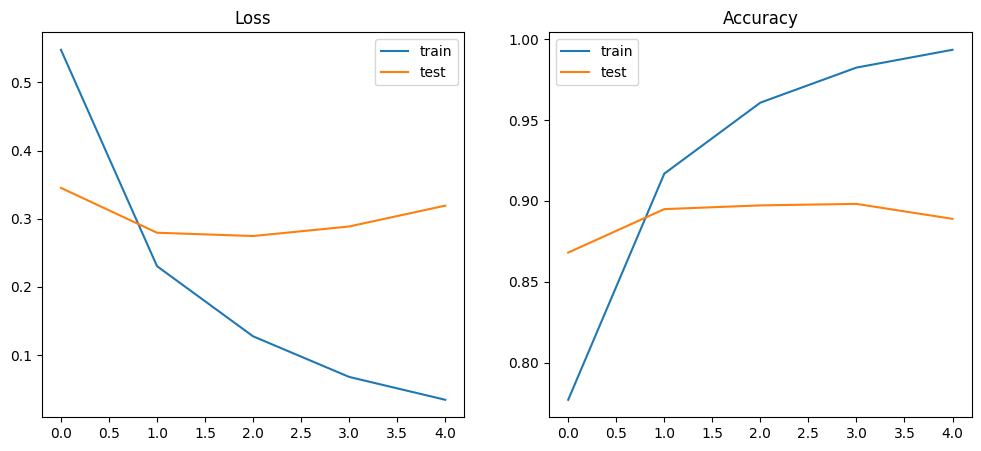

In [77]:
import matplotlib.pyplot as plt

# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot Loss on the first subplot
ax1.set_title('Loss')
ax1.plot(history.history['loss'], label='train')
ax1.plot(history.history['val_loss'], label='test')
ax1.legend()

# Plot Accuracy on the second subplot
ax2.set_title('Accuracy')
ax2.plot(history.history['accuracy'], label='train')
ax2.plot(history.history['val_accuracy'], label='test')
ax2.legend()

# Display the plots
plt.show()

In [76]:
new_review = ['''Very upsetting, I had a few million coins when the dang game started glitching, I would make a shot and the game would glitch and you could clearly see that the shot went in but the screen would flàsh and the balls would be right back like they were before I shot. And the opponent would have ball in hand. Then for some ungodly reason the game restarted and almost all of my coins were gone!!!!! There should be some way to get them back since it was the game that took them. About ready to delete!!''']
seq = tokenizer.texts_to_sequences(new_review)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = model.predict(padded)
labels = ['neg', 'neutral', 'pos']
print(pred, labels[np.argmax(pred)])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
[[9.9902821e-01 6.0732036e-05 9.1105839e-04]] neg
